An example of working with pipeline

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations
from copy import deepcopy

import hyper_img as hyper

In [2]:
import warnings
warnings.filterwarnings("ignore")

Pathes and constants

In [3]:
IMG_PATH = '/home/igor/projects/Seed/2024_08_12/new_data'
TARGET_VARIABLE = 'Mutation(myc2_nud)'

In [4]:
import os

cube_names = []
for name in os.listdir(IMG_PATH):
    if name.split('.')[-1] == 'tiff' and name.split('.')[0].split('_')[-1] == 'cube':
        cube_names.append(name)

Read table

In [5]:
df = pd.read_excel('new_data_table.xlsx')
df = df.rename(columns={'Mutation (myc2_nud)': TARGET_VARIABLE})

for col in ['Image Name', 
            'Black calibration data', 
            'White calibration data']:
    for i in range(len(df)):
        for name in cube_names:
            if df.loc[i][col] == '':
                continue
            name_num = int(name.split('_')[2])
            if int(df.loc[i][col].split('_')[1]) == name_num:
                df.loc[i, col] = name
                break
            
df['ID партии'] = '12.08.2024'
df.head(5)

,Line,Mutation(myc2_nud),Image Name,Black calibration data,White calibration data,Group,Batch,ID партии
0,Donor-line E16-6 (nud),donor_line_nud,session_002_017_cube.tiff,session_002_015_snapshot_cube.tiff,session_002_014_snapshot_cube.tiff,white naked control,1,12.08.2024
1,Donor-line E33-4 (nud),donor_line_nud,session_002_018_cube.tiff,session_002_015_snapshot_cube.tiff,session_002_014_snapshot_cube.tiff,white naked control,1,12.08.2024
2,E29,WT_-17,session_002_020_cube.tiff,session_002_015_snapshot_cube.tiff,session_002_014_snapshot_cube.tiff,white naked control,1,12.08.2024
3,E2C-1,-1_-17,session_002_022_cube.tiff,session_002_015_snapshot_cube.tiff,session_002_014_snapshot_cube.tiff,blue mutants,1,12.08.2024
4,E4A-2,-1_-17,session_002_024_cube.tiff,session_002_015_snapshot_cube.tiff,session_002_014_snapshot_cube.tiff,blue mutants,1,12.08.2024


Create HyperDataPixels object

In [6]:
# HyperData object
data = hyper.HyperDataPixels(seq_names=IMG_PATH + '/' + df['Image Name'],
                            class_name=hyper.TableHyperImg,
                            segmenter=hyper.CircleCv2Segmenter(threshold=25),
                            table=df,
                            factors_columns=[TARGET_VARIABLE, 'Batch'],
                            number_buckets=20,
                            name_column='Image Name',
                            plant_number_column='Line',
                            column_for_marking='')

 Mutation(myc2_nud)(donor_line_nud); Batch(1);

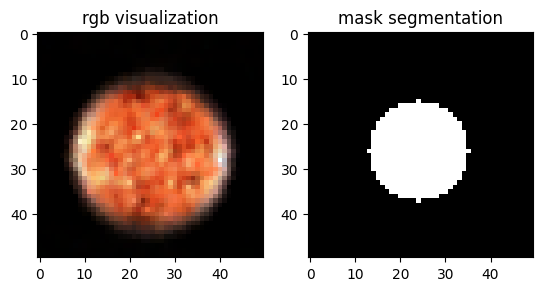

In [7]:
# HyperImg object
hyper_lst = data.hyper_imgs_lst;
hyper_lst[0]

In [8]:
# HyperImg objects description
data.hyper_table.head(5)

,wl_450,wl_454,wl_458,wl_462,wl_466,wl_470,wl_474,wl_478,wl_482,wl_486,...,wl_978,wl_982,wl_986,wl_990,wl_994,wl_998,Object name,Mutation(myc2_nud),Batch,all_factors
0,0.085935,0.103015,0.112784,0.120138,0.125703,0.130993,0.135313,0.136708,0.139572,0.144431,...,0.252180,0.249786,0.248691,0.247523,0.247076,0.249157,Donor-line E16-6 (nud),donor_line_nud,1,Mutation(myc2_nud)(donor_line_nud); Batch(1);
1,0.082550,0.098601,0.107031,0.113090,0.120223,0.125675,0.130008,0.130307,0.134693,0.138405,...,0.251919,0.251019,0.250564,0.248701,0.247626,0.249132,Donor-line E16-6 (nud),donor_line_nud,1,Mutation(myc2_nud)(donor_line_nud); Batch(1);
2,0.092713,0.108940,0.118680,0.123962,0.131490,0.137308,0.142038,0.142426,0.146998,0.151151,...,0.250270,0.247825,0.246799,0.244736,0.245531,0.245265,Donor-line E16-6 (nud),donor_line_nud,1,Mutation(myc2_nud)(donor_line_nud); Batch(1);
3,0.093869,0.108172,0.118802,0.123566,0.129168,0.135214,0.139904,0.140092,0.145263,0.149948,...,0.246999,0.248716,0.246566,0.247104,0.246862,0.247068,Donor-line E16-6 (nud),donor_line_nud,1,Mutation(myc2_nud)(donor_line_nud); Batch(1);
4,0.087795,0.100565,0.110032,0.116345,0.120854,0.127589,0.130552,0.131310,0.136466,0.139955,...,0.253408,0.252995,0.253590,0.254396,0.255051,0.255319,Donor-line E16-6 (nud),donor_line_nud,1,Mutation(myc2_nud)(donor_line_nud); Batch(1);


In [9]:
# we have 2 factors
data.factors

['Mutation(myc2_nud)', 'Batch']

run pipeline

In [10]:
# run pipeline
hyper.create_folder_with_all_graphs(data,
                                    stat_test_names=['Tukey', 'Mann-Whitneyu', 'ANOVA'],
                                    factors_pairwise_tests=[TARGET_VARIABLE], 
                                    folder_path='example')

run a separate functions

In [11]:
# also you can create your own pipeline, run a separate function
# for example PCA pd.DataFrame
hyper.get_df_pca_and_explained_variance(data, n_components=5)[0].head(5)

,1,2,3,4,5,Object name,all_factors
0,1.490891,0.111164,0.037304,-0.025030,-0.061225,Donor-line E16-6 (nud),Mutation(myc2_nud)(donor_line_nud); Batch(1);
1,1.496340,0.086449,0.032098,-0.045581,-0.060893,Donor-line E16-6 (nud),Mutation(myc2_nud)(donor_line_nud); Batch(1);
2,1.705861,0.125309,0.038211,0.035510,-0.065540,Donor-line E16-6 (nud),Mutation(myc2_nud)(donor_line_nud); Batch(1);
3,1.622331,0.114004,0.056649,0.031788,-0.050412,Donor-line E16-6 (nud),Mutation(myc2_nud)(donor_line_nud); Batch(1);
4,1.494992,0.075862,0.039083,-0.036507,-0.039492,Donor-line E16-6 (nud),Mutation(myc2_nud)(donor_line_nud); Batch(1);


In [12]:
# for example PCA graph
hyper.get_2_pca_graph(data, download_path='pca.html')

Machine learning

In [13]:
# classification by TARGET_VARIABLE
hyper.get_table_res_and_confusion_matrix(data, target_varible_name=TARGET_VARIABLE);